##Recognizing ASL Fingerspelling Using Machine Learning
####Dataset Name: ASL Alphabet
####[Kaggle Data Soruce](https://www.kaggle.com/datasets/grassknoted/asl-alphabet)
####Goal: Develop a machine learning model to recognize ASL fingerspelling from images.

####Dataset Overview:
- American Sign Language alphabet dataset from Kaggle
- Contains 87,000 training images across 29 classes
- 26 classes represent letters A-Z and 3 additional classes

###Dataset Characteristics:
- Images show hand gestures against backgrounds
- Images 200x200 pixels
- Each image shows static hand position corresponding to a letter

###Class Selection:
- Despite having 29 classes in the full dataset, our analysis focuses on 18 letters

###The Objective
- To accurately classify ASL alphabet images into their respective letter classes

In [165]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2

In [167]:
dataset_path = "./asl_alphabet_data"

In [169]:
#grabs all the folder names in the dataset and sorts them
all_classes = sorted([os.path.basename(folder) for folder in glob.glob(os.path.join(dataset_path, "*"))])

def print_classes(title, class_list, rows, cols):
    #prints the title along with the number of items in the class list
    print(f"{title}: {len(class_list)}")
    #prints a header for the dataset classes
    print("\nDataset Classes:")
    index = 0 #keep track of the current position
    for row in range(rows):
        row_classes = [] #stores the items for the current row
        for col in range(cols):
            row_classes.append(class_list[index]) #adds the class name to the row list
            index += 1 #moves to the next class in the list
        print(" | ".join(row_classes)) #prints the row

#calls print_class function
print_classes("Total Dataset Classes", all_classes, 3, 9)

Total Dataset Classes: 27

Dataset Classes:
A | B | C | D | E | F | G | H | I
J | K | L | M | N | O | P | Q | R
S | T | U | V | W | X | Y | Z | nothing


---
###Selected Letters 

I'm picking a smaller set of ASL letters to make the dataset easier to work with and keep things running smoothly on my computer. Some letters, like "J" and "Z," need movement to sign, so they don’t work as well with static images.

In [172]:
#list of ASL letters we selected for this project
asl_keep = ["A", "B", "C", "D", "E", "F", "H", "I", "L", "O", "Q", "R", "S", "U", "V", "W", "X", "Y"]

#calls print_class function
print_classes("Selected ASL Letters", asl_keep, 2, 9)

Selected ASL Letters: 18

Dataset Classes:
A | B | C | D | E | F | H | I | L
O | Q | R | S | U | V | W | X | Y


In [174]:
#list to store image file paths for selected asl letters
asl_paths_train = []

for letter in asl_keep:
    #creates the full path to the letters folder
    letter_path = os.path.join(dataset_path, letter)
    #grabs all jpg images inside the letters folders
    letter_images = glob.glob(os.path.join(letter_path, "*.jpg"))
    #adds up to 500 images from this letter to the training list
    asl_paths_train.extend(letter_images[:500])

#extracts the letter label from each image
asl_labels_train = [os.path.basename(os.path.dirname(img)) for img in asl_paths_train]

#creates a df with the image paths and their labels
train_asl_df = pd.DataFrame({"image_path": asl_paths_train, "letter_label": asl_labels_train})

#prints total number of images added to the dataset
print(f"\nTotal images loaded: {len(train_asl_df)}")
#counts how many images belong to each letter
class_distribution = train_asl_df['letter_label'].value_counts()
#sort alphabetically instead of by count
class_distribution = class_distribution.sort_index()

#prints a breakdwon of how many images there are per class
print("\nImages per class:")
print("-" * 20)
for letter, count in class_distribution.items():
    print(f"Letter {letter}: {count:4d} images")
print("-" * 20)


Total images loaded: 9000

Images per class:
--------------------
Letter A:  500 images
Letter B:  500 images
Letter C:  500 images
Letter D:  500 images
Letter E:  500 images
Letter F:  500 images
Letter H:  500 images
Letter I:  500 images
Letter L:  500 images
Letter O:  500 images
Letter Q:  500 images
Letter R:  500 images
Letter S:  500 images
Letter U:  500 images
Letter V:  500 images
Letter W:  500 images
Letter X:  500 images
Letter Y:  500 images
--------------------


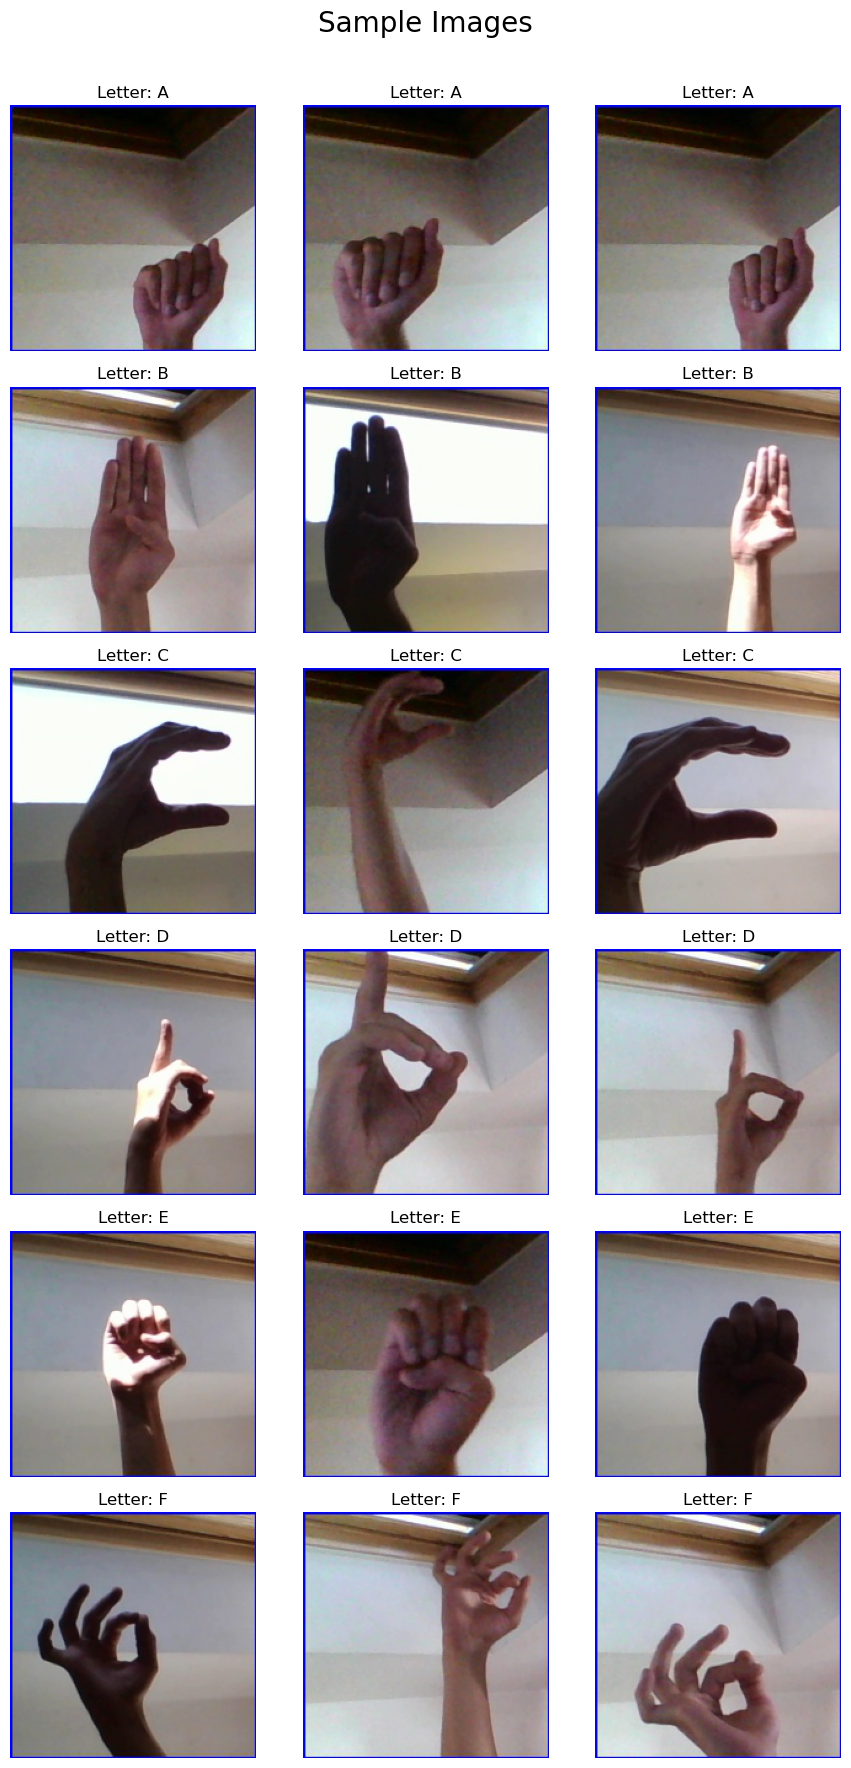

In [176]:
#display a grid of sample images for letters
letters = asl_keep[:6]
samples_per_letter = 3

#creates a grid of subplots on the number of letter and samples per letter
rows = len(letters)
cols = samples_per_letter
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))


for i, letter in enumerate(letters):
    #randomly selects the specified number of images for this letter
    letter_samples = train_asl_df[train_asl_df['letter_label'] == letter].sample(samples_per_letter)
    
    for j, (_, row) in enumerate(letter_samples.iterrows()):
        #load the image from its file path
        img = plt.imread(row['image_path'])
        #displays the image in the corresponding subplit
        axes[i, j].imshow(img)
        #sets the title above each image with the letter label
        axes[i, j].set_title(f"Letter: {letter}")
        #removes axis markings
        axes[i, j].axis('off')
        
        for spine in axes[i, j].spines.values():
            #adds a border around each image  
            spine.set_visible(True)
            spine.set_color('gray')
            spine.set_linewidth(0.5)

#sets the overall title for the entire gird
plt.suptitle("Sample Images", fontsize=20)
#adjusts the layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.97])
#displays the plot
plt.show()

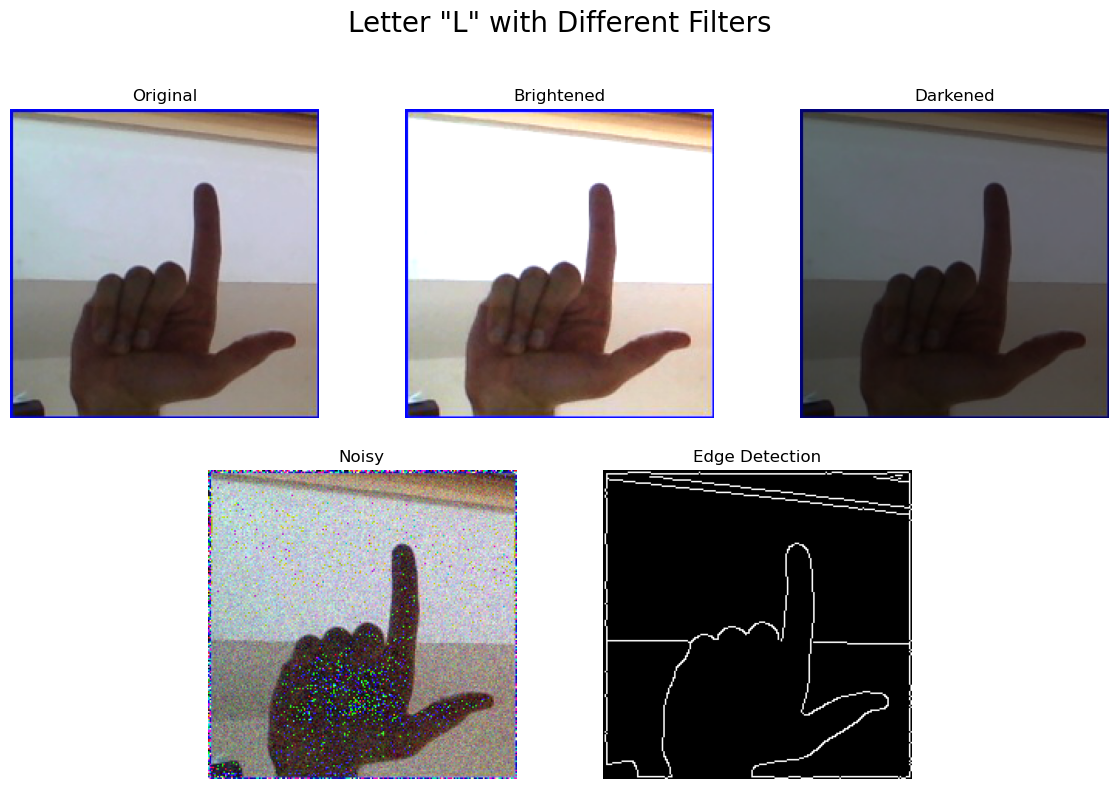

In [184]:
#randomly select letter from the dataset
letter = random.choice(asl_keep)

#grabs a random image from the selected letter
img_row = train_asl_df[train_asl_df['letter_label'] == letter].sample(1).iloc[0]
#gets the file path of the selected images
img_path = img_row['image_path']

#loads the image
img = plt.imread(img_path)

#sets up the figure and grid
fig = plt.figure(figsize=(12, 8))
#main title
fig.suptitle(f"Letter \"{letter}\" with Different Filters", fontsize=20)

#creates a 2 row 3 column grid
grid = plt.GridSpec(2, 3, figure=fig, height_ratios=[1, 1])

#subplots for the first row
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[0, 2])

#subplots for the second row
ax4 = fig.add_subplot(grid[1, 0:2])  #spans columns 0 and 1
ax5 = fig.add_subplot(grid[1, 1:3])  #spans columns 1 and 2

#first row first column will show the original image
ax1.imshow(img)
ax1.set_title("Original")

#first row second column will show a brightened image
bright_img = np.clip(img * 1.5, 0, 255).astype(np.uint8) #increase the brightness by multipling the pixel values
ax2.imshow(bright_img)
ax2.set_title("Brightened")

#first row third column will show a darkened image
dark_img = np.clip(img * 0.5, 0, 255).astype(np.uint8) #decrease the brightness by multipling pixel values
ax3.imshow(dark_img)
ax3.set_title("Darkened")

#second row first column/second column will show a noisy image
noisy_img = img.copy()
noise = np.random.normal(0, 20, img.shape).astype(np.uint8) #generates random Gaussian noise 
noisy_img = np.clip(img + noise, 0, 255).astype(np.uint8) #adds noise and clips values to keep within range 
ax4.imshow(noisy_img)
ax4.set_title("Noisy")

#second row second column/third column will show edge detection
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #converts to grayscale
edges = cv2.Canny(gray, 100, 200) #applies canny edge detection
ax5.imshow(edges, cmap='gray')
ax5.set_title("Edge Detection")

#hides the axes for all subplots
all_axes = [ax1, ax2, ax3, ax4, ax5]
for ax in all_axes:
    ax.axis('off')

#adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
#display plots
plt.show()